# Estatística Aplicada II
## Segunda Lista de Exercícios
### Estudante: Clístenes Grizafis Bento

<p>Com a base de dados “prodbebidas” (dados mensais do índice de produção de bebidas no Brasil) obter os seguintes resultados com o auxílio do “R”</p>
<p>Fazer a todos os testes estatísticos e gráficos necessários e a predição para os próximos 6 meses do índice de produção de bebidas para os seguintes modelos:</p>

     i.	ETS;
    ii.	ARIMA OU SARIMA (verificar se existe sazonalidade ou não e decidir qual modelo é mais adequado);
    
    Obs: separe os últimos 12 meses da série para testar o modelo.

## ETS

### Importando pacotes necessários

In [ ]:
library("ggplot2")
library("forecast")
library("seasonal")
library("dplyr")
library("readxl")
library("plotly")
library("tidyverse")
library("gridExtra")
library("forecast")
library("TTR")
library("smooth")
library("tsibble")
library("fable")
library("tsibbledata")
library("fpp3")
library("urca")

### Importando dados e declarando a série como objeto da classe ts

In [189]:
prodbebidas <- read_excel("prodbebidas.xls")

In [188]:
#prodbebidas[[2]]

In [190]:
prodbebidas <- prodbebidas[2]
prodbebidas

Prodbebidas
62.55626
57.84550
60.69372
62.65435
62.31734
60.49615
60.16045
67.33102
66.58131
83.37684


In [ ]:
prodbebidas_ts <- ts(data = prodbebidas,
             start = c(2002, 1),
             end = c(2022, 4),
             frequency = 12)

In [ ]:
prodbebidas_ts

In [172]:
length(prodbebidas_ts)

[1] 244

### Separação do dataset para treinar e testar o modelo

#### Dados de treino

In [204]:
prodbebidastreino <- window(prodbebidas_ts,start=c(2002,1), 
                     end=c(2021,4))


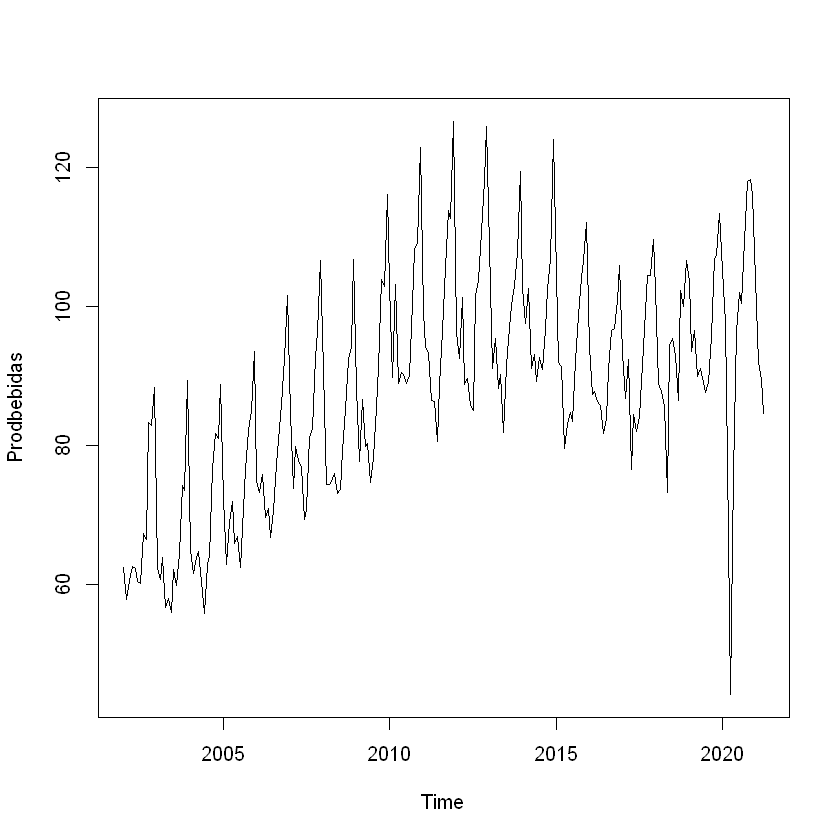

In [205]:
plot(prodbebidastreino)

In [206]:
length(prodbebidastreino)

[1] 232

#### Dados de teste

In [207]:
prodbebidasteste <- window(prodbebidas_ts,start=c(2021,5), 
                     end=c(2022,4))

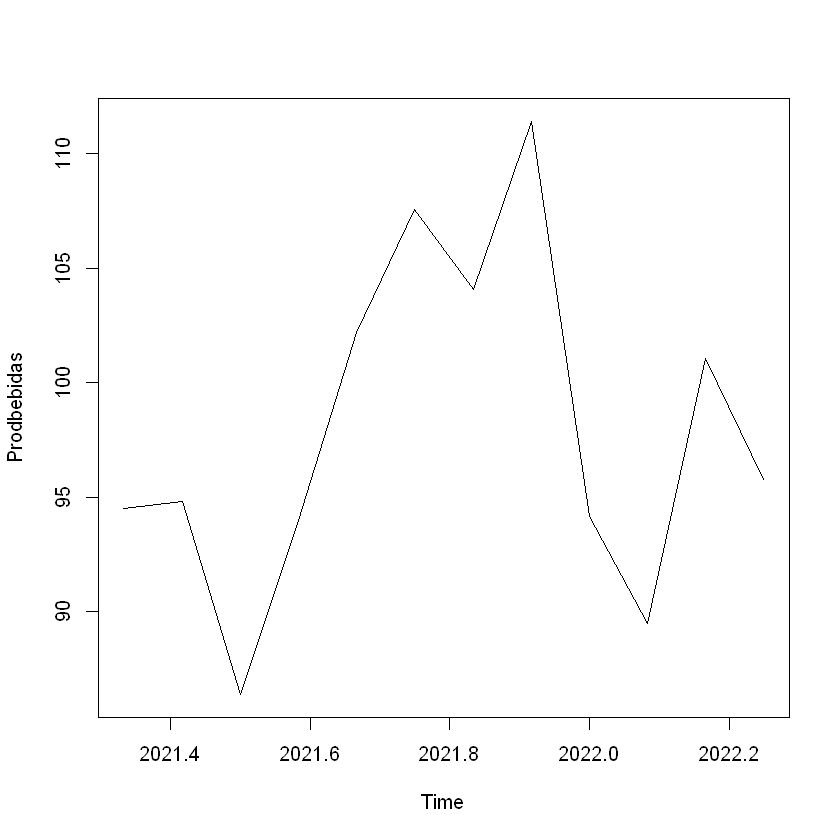

In [208]:
plot(prodbebidasteste)

In [210]:
length(prodbebidasteste)

[1] 12

### Estimando o modelo ETS

In [211]:
prodbebidastreino.ets <- ets(prodbebidastreino)
summary(prodbebidastreino.ets)

ETS(A,N,A) 

Call:
 ets(y = prodbebidastreino) 

  Smoothing parameters:
    alpha = 0.5324 
    gamma = 0.1855 

  Initial states:
    l = 68.3188 
    s = 22.2949 11.6767 10.4517 0.0984 -2.9925 -7.4788
           -10.2453 -6.8968 -6.2432 -3.005 -6.982 -0.678

  sigma:  5.6518

     AIC     AICc      BIC 
2082.839 2085.061 2134.540 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.2423636 5.478619 3.752648 -0.02880651 4.494228 0.6607421
                  ACF1
Training set 0.1047277


###### pelo modelo é possível perceber que tem sasionalidade aditiva

### Fazendo previsão para os 12 períodos da base de teste

In [221]:
prodbebidas.ets.forescasts <- forecast.ets(prodbebidastreino.ets, h=12)
summary(prodbebidas.ets.forescasts)


Forecast method: ETS(A,N,A)

Model Information:
ETS(A,N,A) 

Call:
 ets(y = prodbebidastreino) 

  Smoothing parameters:
    alpha = 0.5324 
    gamma = 0.1855 

  Initial states:
    l = 68.3188 
    s = 22.2949 11.6767 10.4517 0.0984 -2.9925 -7.4788
           -10.2453 -6.8968 -6.2432 -3.005 -6.982 -0.678

  sigma:  5.6518

     AIC     AICc      BIC 
2082.839 2085.061 2134.540 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.2423636 5.478619 3.752648 -0.02880651 4.494228 0.6607421
                  ACF1
Training set 0.1047277

Forecasts:
         Point Forecast     Lo 80     Hi 80    Lo 95    Hi 95
May 2021       91.68192  84.43884  98.92499 80.60459 102.7592
Jun 2021       95.22489  87.01919 103.43060 82.67535 107.7744
Jul 2021       94.00474  84.93804 103.07144 80.13842 107.8711
Aug 2021       95.38278  85.53005 105.23552 80.31432 110.4512
Sep 2021      100.58180  90.00126 111.16235 84.40026 116.7633
Oct 2021      109.23093 

### Plotando gráfico com as previsões

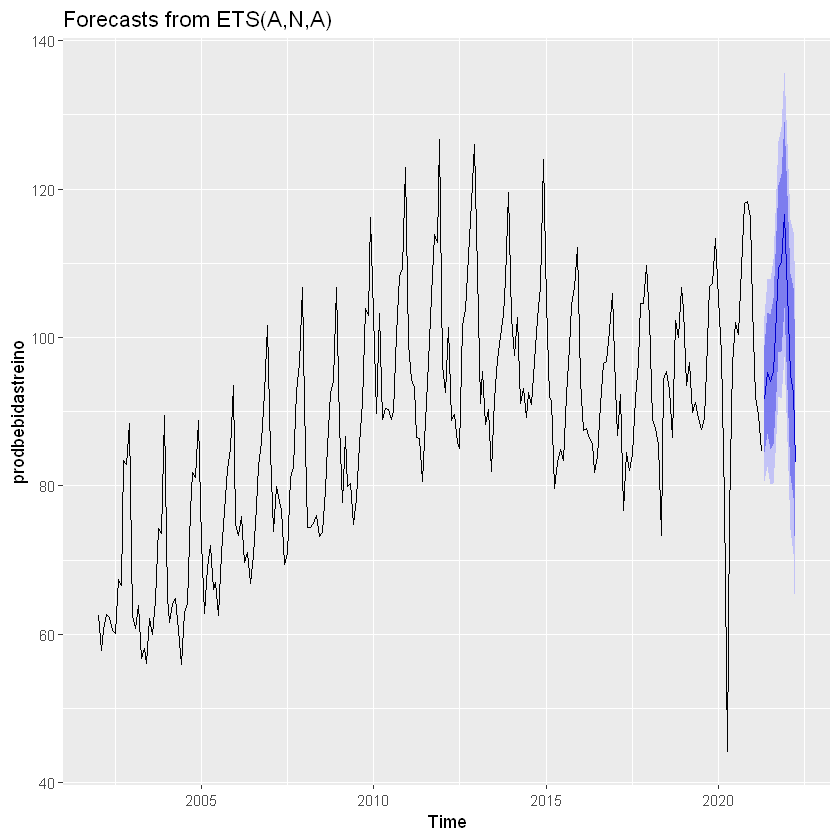

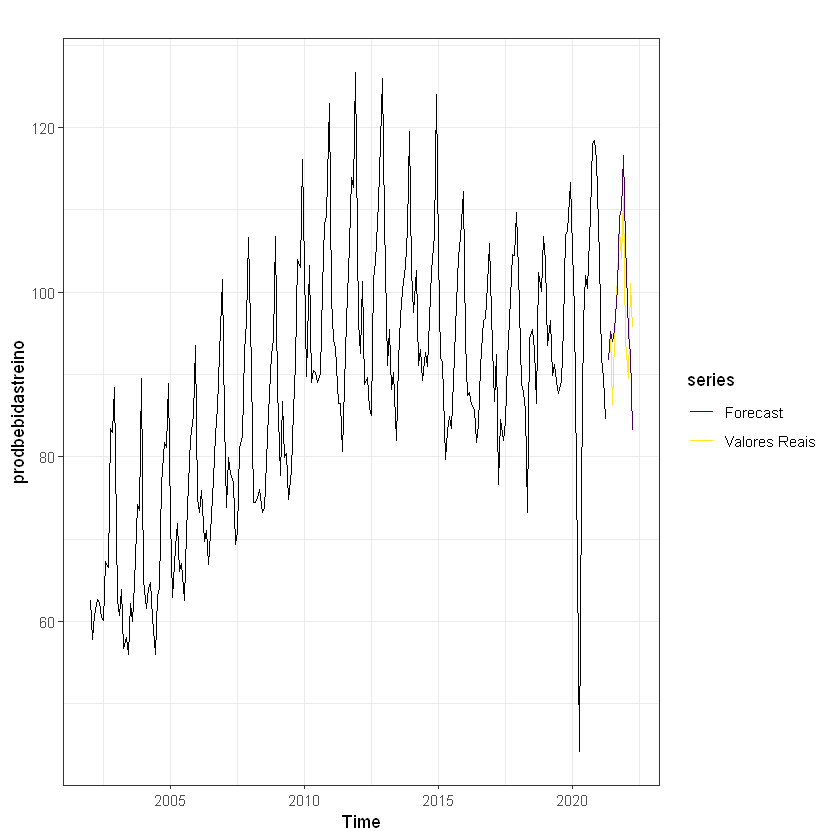

In [231]:
autoplot(prodbebidas.ets.forescasts)

plot(
  autoplot(prodbebidastreino)+
    autolayer(prodbebidasteste,serie="Valores Reais")+
    autolayer(prodbebidas.ets.forescasts$mean, serie="Forecast")+
    scale_colour_viridis_d()+
    scale_y_continuous(labels=scales::comma)+
    theme_bw()
)

##### Graficamente a previsão ficou um relativamente aproximada ao valor real, iremos ver se estatísticamente também.

### Gerando objetos para plotagem conjunta

#### Acurácia na base de teste

In [232]:
accuracy(prodbebidas.ets.forescasts$mean,prodbebidasteste)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-1.182813,6.69891,5.432951,-1.285254,5.634968,0.3820066,0.8175471


Ao avaliar os resíduos percebemos uma porcentagem de erro alta.

#### Plotagem dos resíduos da estimativa

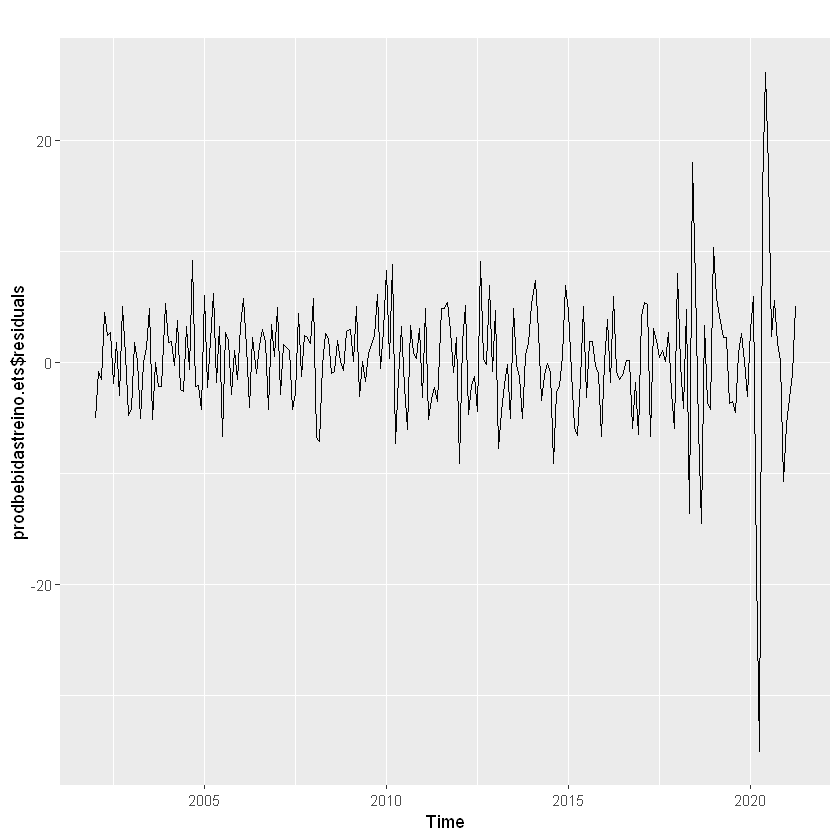

In [234]:
autoplot(prodbebidastreino.ets$residuals)

##### A maior variação ocorre no período de 2020, que talvez possa ser justificada pelo período de pandemia

#### Plotando a função de autocorrelação da estimativa

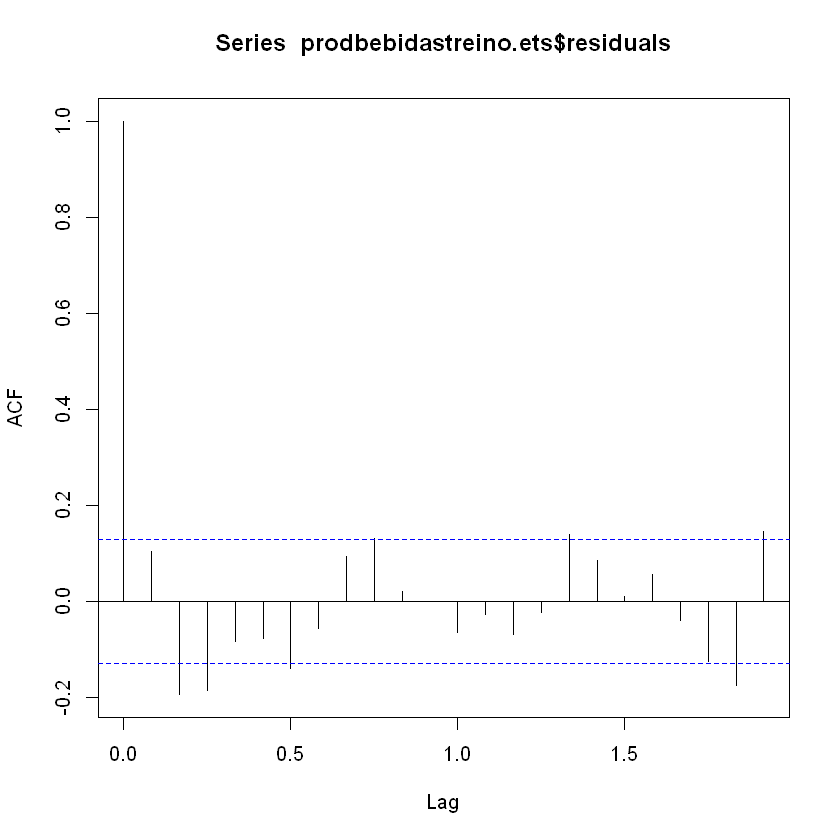

In [248]:
acf(prodbebidastreino.ets$residuals)

##### Pelo gráfico pode-se deduzir que a variação dos resíduos é de lag 1.

####  Teste de Ljung-box

In [236]:
Box.test(prodbebidastreino.ets$residuals, lag=1,
         type=c("Ljung-Box"))


	Box-Ljung test

data:  prodbebidastreino.ets$residuals
X-squared = 2.5776, df = 1, p-value = 0.1084


#### como p-value > 0.05, podemos concluir que os resíduos são iid, ou seja o modelo não exibe falhas de ajuste.

## ARIMA OU SARIMA (verificar se existe sazonalidade ou não e decidir qual modelo é mais adequado);

### Usando ETS para verificar sazonalidade

In [241]:
prodbebidas_ts.ets <- ets(prodbebidas_ts)
summary(prodbebidas_ts.ets)

ETS(A,N,A) 

Call:
 ets(y = prodbebidas_ts) 

  Smoothing parameters:
    alpha = 0.3763 
    gamma = 2e-04 

  Initial states:
    l = 71.3083 
    s = 20.561 11.3803 10.1487 2.104 -2.6227 -7.781
           -9.5055 -8.0437 -10.4038 -2.7043 -5.6323 2.4994

  sigma:  5.6966

     AIC     AICc      BIC 
2205.945 2208.051 2258.403 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.3215948 5.530732 3.736095 -0.01695785 4.456926 0.6356366
                  ACF1
Training set 0.2331474


##### O ETS indica sazonalidade, vamos plotar gráfico com dados de treino e teste para comparar

### Plotando séries de treino e teste juntas para checagem

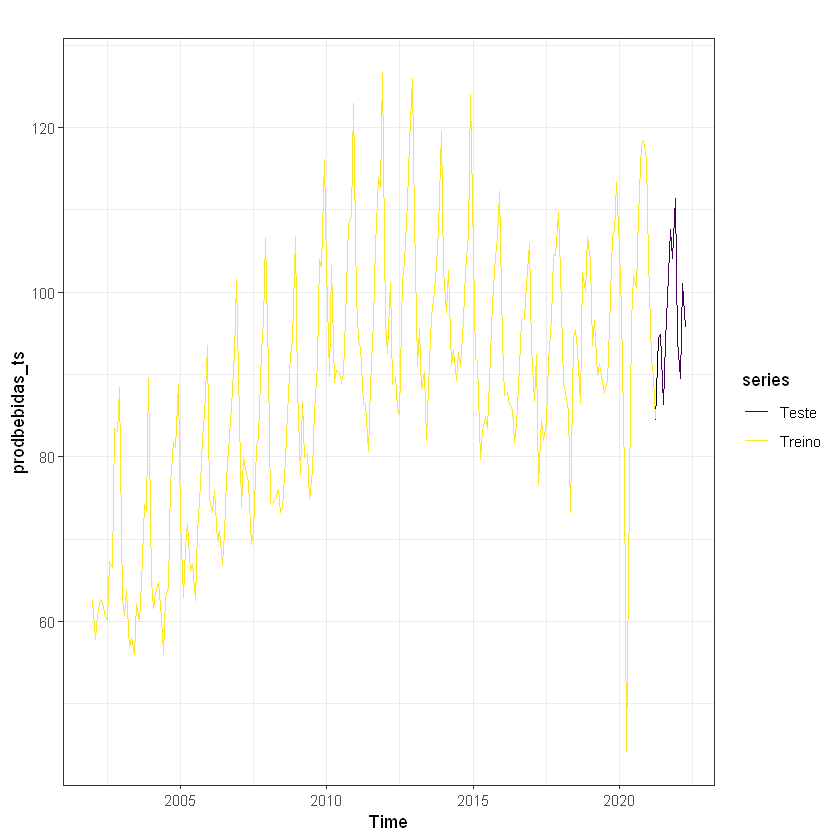

In [242]:
autoplot(prodbebidas_ts) +
  autolayer(prodbebidastreino, series="Treino") +
  autolayer(prodbebidasteste, series="Teste") +
  scale_color_viridis_d() +
  theme_bw()

### Análise da Série

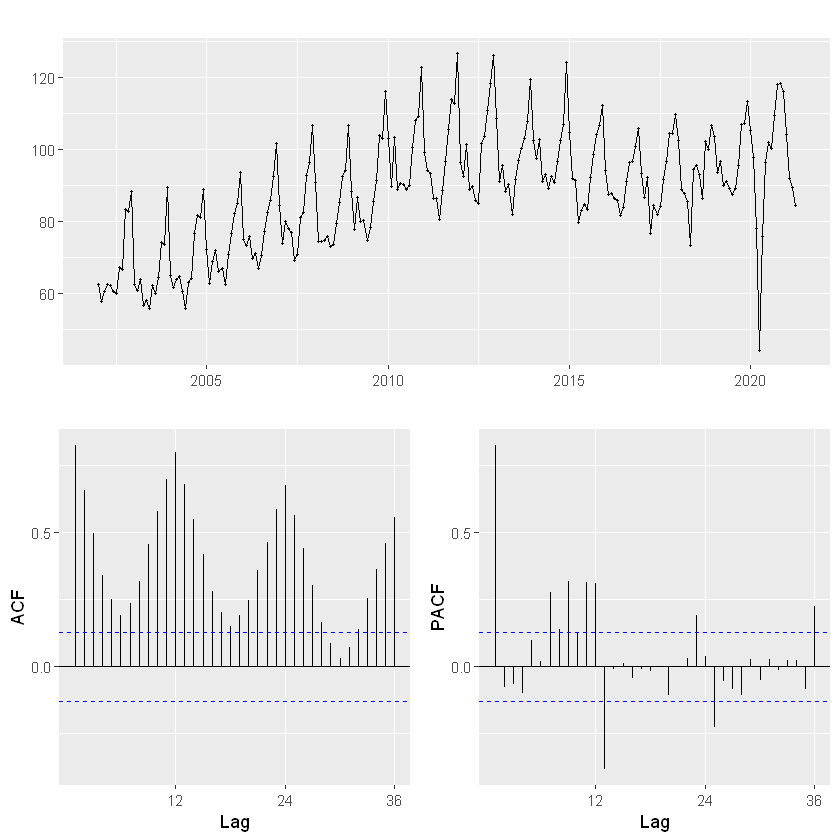

In [244]:
ggtsdisplay(prodbebidastreino)

##### O gráfico de análise indica uma possível sazonalidade.

### O modelo SARiMA é o mais adequado.

### Verificar se a série é estacionária usando Teste de Dickey-Fuller

#### ==> none

In [251]:
prodbebidastreinoadf=ur.df(prodbebidastreino, selectlags = 'BIC',
                      type = 'none')
summary(prodbebidastreinoadf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.811  -3.887   1.481   6.293  31.299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    -0.004159   0.006839  -0.608    0.544
z.diff.lag -0.019705   0.066291  -0.297    0.767

Residual standard error: 9.254 on 228 degrees of freedom
Multiple R-squared:  0.002112,	Adjusted R-squared:  -0.006641 
F-statistic: 0.2413 on 2 and 228 DF,  p-value: 0.7858


Value of test-statistic is: -0.6081 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


##### z.lag.1 > 0.05 indica ser estacionária.

#### ==> drift

In [252]:
prodbebidastreinoadf=ur.df(prodbebidastreino, selectlags = 'BIC',
                      type = 'drift')
summary(prodbebidastreinoadf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.393  -5.189   0.232   5.808  25.665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.92751    3.43523   4.928 1.60e-06 ***
z.lag.1     -0.19112    0.03850  -4.965 1.35e-06 ***
z.diff.lag   0.07004    0.06572   1.066    0.288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.815 on 227 degrees of freedom
Multiple R-squared:  0.0984,	Adjusted R-squared:  0.09045 
F-statistic: 12.39 on 2 and 227 DF,  p-value: 7.84e-06


Value of test-statistic is: -4.9646 12.3445 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


##### z.lag.1 < 0.05 indica não ser estacionária

#### ==> trend

In [253]:
prodbebidastreinoadf=ur.df(prodbebidastreino, selectlags = 'BIC',
                      type = 'trend')
summary(prodbebidastreinoadf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.441  -5.304   0.145   5.314  21.379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.13487    3.64273   6.076 5.17e-09 ***
z.lag.1     -0.30345    0.04867  -6.235 2.19e-09 ***
tt           0.04009    0.01107   3.622 0.000361 ***
z.diff.lag   0.12996    0.06613   1.965 0.050635 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.588 on 226 degrees of freedom
Multiple R-squared:  0.1479,	Adjusted R-squared:  0.1366 
F-statistic: 13.07 on 3 and 226 DF,  p-value: 6.659e-08


Value of test-statistic is: -6.2351 13.0424 19.5416 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.

##### z.lag.1 < 0.05 indica não ser estacionária

#### Não temos certeza se a série é estacionária ou não, os ADF tiveram resultados diferentes.

#### Vamos ver o que a rotina de detecção de diferenciações nos diz.

### Detecção de diferenciações

In [254]:
ndiffs(prodbebidastreino)

[1] 1

##### A série é não estácionária

In [257]:
### Confirmando a detecção de diferenciações

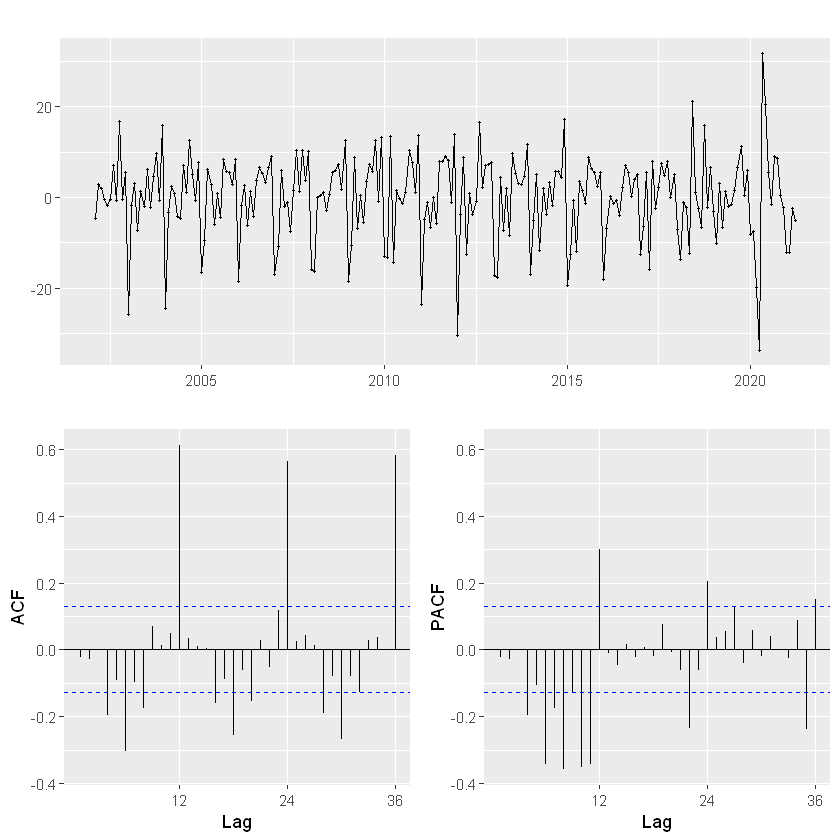

In [255]:
difprodbebidastreino = diff(prodbebidastreino)
ggtsdisplay(difprodbebidastreino)

In [256]:
prodbebidastreinoadfdif = ur.df(difprodbebidastreino, type = 'none',
                         selectlags = 'BIC')
summary(prodbebidastreinoadfdif)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.409  -4.185   1.160   6.003  30.439 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.05217    0.09491 -11.086   <2e-16 ***
z.diff.lag  0.02993    0.06635   0.451    0.652    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.276 on 227 degrees of freedom
Multiple R-squared:  0.511,	Adjusted R-squared:  0.5067 
F-statistic: 118.6 on 2 and 227 DF,  p-value: < 2.2e-16


Value of test-statistic is: -11.0857 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [258]:
prodbebidastreinoadfdif = ur.df(difprodbebidastreino, type = 'drift',
                         selectlags = 'BIC')
summary(prodbebidastreinoadfdif)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.526  -4.295   1.050   5.894  30.318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11132    0.61439   0.181    0.856    
z.lag.1     -1.05253    0.09514 -11.063   <2e-16 ***
z.diff.lag   0.03010    0.06649   0.453    0.651    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.295 on 226 degrees of freedom
Multiple R-squared:  0.5111,	Adjusted R-squared:  0.5067 
F-statistic: 118.1 on 2 and 226 DF,  p-value: < 2.2e-16


Value of test-statistic is: -11.0634 61.201 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


### Detectando sazonalidade e tratando modelo usando auto.arima

In [259]:
arimaprodbebidas = auto.arima(prodbebidastreino, trace=T)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,1,1)[12] with drift         : 1333.728
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1469.595
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 1361.981
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 1378.039
 ARIMA(0,0,0)(0,1,0)[12]                    : 1479.418
 ARIMA(2,0,2)(0,1,1)[12] with drift         : 1332.551
 ARIMA(2,0,2)(0,1,0)[12] with drift         : 1418.309
 ARIMA(2,0,2)(0,1,2)[12] with drift         : 1332.972
 ARIMA(2,0,2)(1,1,0)[12] with drift         : 1359.787
 ARIMA(2,0,2)(1,1,2)[12] with drift         : 1335.388
 ARIMA(1,0,2)(0,1,1)[12] with drift         : 1332.054
 ARIMA(1,0,2)(0,1,0)[12] with drift         : 1415.699
 ARIMA(1,0,2)(1,1,1)[12] with drift         : 1331.24
 ARIMA(1,0,2)(1,1,0)[12] with drift         : 1359.318
 ARIMA(1,0,2)(2,1,1)[12] with drift         : 1331.14
 ARIMA(1,0,2)(2,1,0)[12] with drift         : 1333.754
 ARIMA(1,0,2)(2,1,2)[12] with drift         : 1329.806
 ARIMA

### Checando resíduos com teste de Ljung-box


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(2,1,2)[12]
Q* = 34.597, df = 17, p-value = 0.007024

Model df: 7.   Total lags used: 24



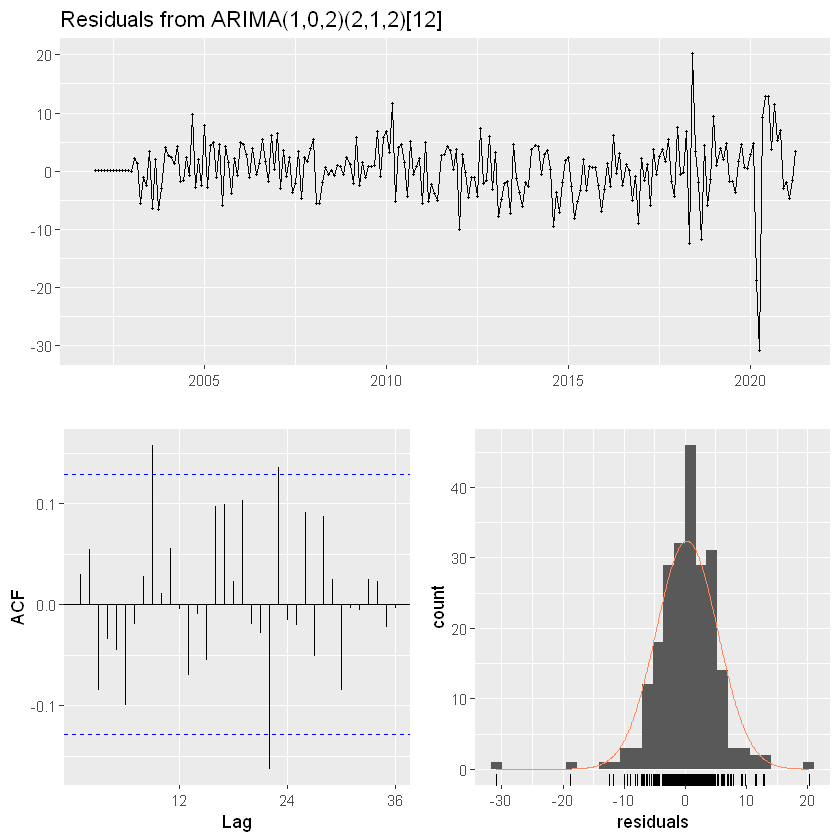

In [260]:
checkresiduals(arimaprodbebidas)

##### p-value = 0.007024<0.05, rejeitamos H0, resíduos são correlacionados. Ou seja o modelo possui falhas de ajustamento

### Checando normalidade dos resíduos

In [262]:
ks.test(arimaprodbebidas$residuals, "pnorm", mean(arimaprodbebidas$residuals),
        sd(arimaprodbebidas$residuals))


	One-sample Kolmogorov-Smirnov test

data:  arimaprodbebidas$residuals
D = 0.067978, p-value = 0.234
alternative hypothesis: two-sided


##### p-valor = 0.234 > 0.05 - Aceita H0, ou seja, resíduos normais

#### Os resultados indicam auto-correlação e não normalidade dos resíduos, o ideal é que não tenha auto-correlação, todavia a fim de avaliar os resultados que obteremos vamos continuar assim.

### Verificando se existe efeitos ARCH

In [270]:
library("FinTS")
ArchTest(arimaprodbebidas$residuals)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  arimaprodbebidas$residuals
Chi-squared = 31.514, df = 12, p-value = 0.001644


##### p-valor 0.001644 < 0.05, rejeita-se H0 supõe a existência de efeitos ARCH (heterocedasticidade)

### Previsão para a série de produção de bebidas

In [271]:
prevprodbebidas=forecast::forecast(arimaprodbebidas, h=12)

### Observando valores da previsão

In [272]:
prevprodbebidas

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
May 2021       85.79982  79.06923  92.53040  75.50627  96.09336
Jun 2021       97.11409  89.48287 104.74532  85.44314 108.78505
Jul 2021       98.38603  90.63347 106.13859  86.52952 110.24255
Aug 2021       97.83107  89.96183 105.70031  85.79611 109.86603
Sep 2021       99.41268  91.43116 107.39421  87.20600 111.61937
Oct 2021      109.70548 101.61581 117.79515  97.33340 122.07756
Nov 2021      110.27721 102.08332 118.47110  97.74573 122.80869
Dec 2021      115.19485 106.90045 123.48924 102.50967 127.88003
Jan 2022      107.03256  98.64122 115.42391  94.19911 119.86602
Feb 2022       96.43855  87.95356 104.92353  83.46188 109.41521
Mar 2022       94.29273  85.71730 102.86816  81.17774 107.40772
Apr 2022       81.20666  72.54382  89.86951  67.95799  94.45534

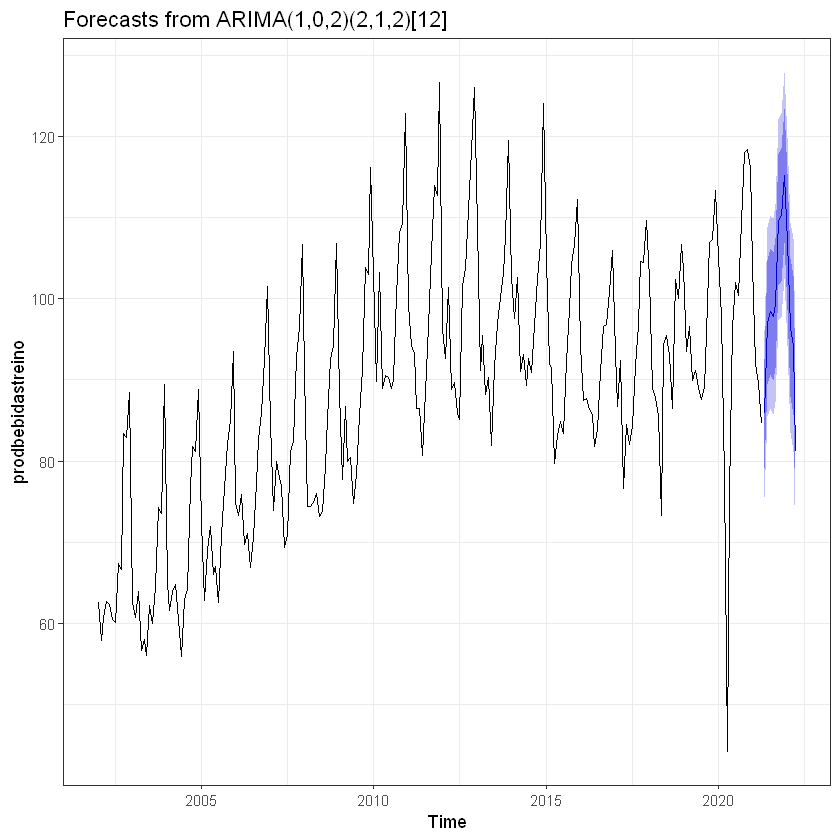

In [273]:
autoplot(prevprodbebidas) +
  theme_bw()

### Estatísticas de acurácia do modelo

In [274]:
accuracy(prevprodbebidas, prodbebidasteste)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.2754421,5.032150,3.576535,0.04480483,4.228811,0.6297333,0.0302036,NA
Test set,-1.4487435,8.049874,6.915202,-1.62271540,7.259174,1.2175843,0.2701566,0.9459907


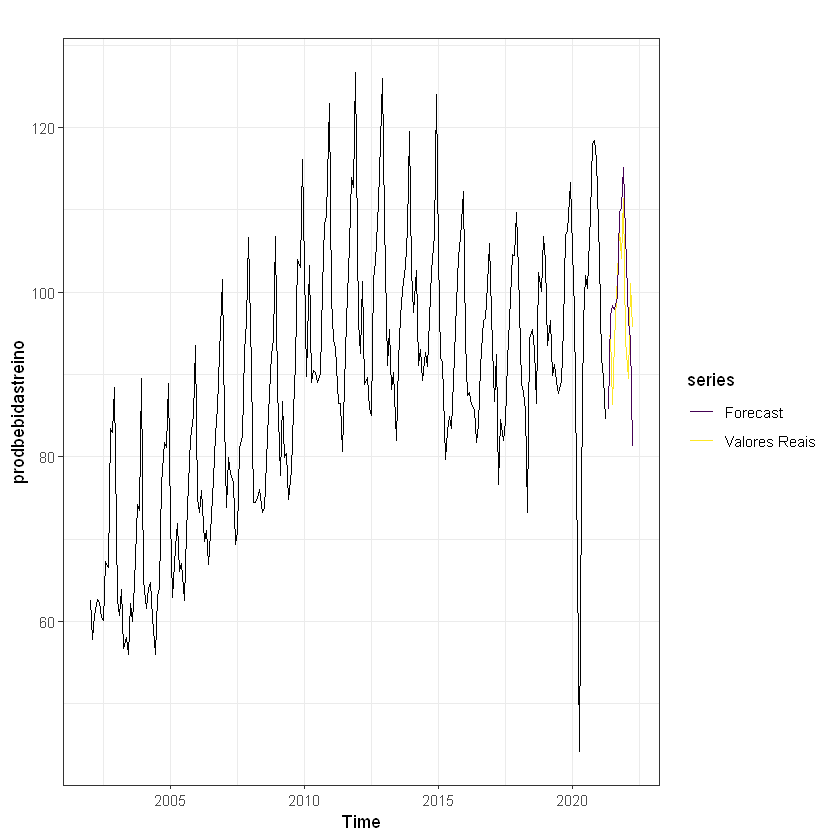

In [278]:
plot(
  autoplot(prodbebidastreino)+
    autolayer(prodbebidasteste,serie="Valores Reais")+
    autolayer(prevprodbebidas$mean, serie="Forecast")+
    scale_colour_viridis_d()+
    scale_y_continuous(labels=scales::comma)+
    theme_bw()
)

#### Avaliando o resultado obtido com a previsão e os valores reais é possível concluir que embora haja diferença entre os resultados o valor previsto ficou relativamente próximo aos reais. Os gráficos indicam que houve grande variação nos valores próximos a 2020, o que gerou divergência no padrão e possívelmente ocasionou o efeito de eterocidade nos dados.